In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [7]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [8]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [34]:
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])


In [61]:
df_2000 = df[df['Year'] >= 2000]
s, i, r, p, st = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
years_2000_to_2050 = np.arange(2000, 2051)
predictions_2000_to_2050 = i + s * years_2000_to_2050

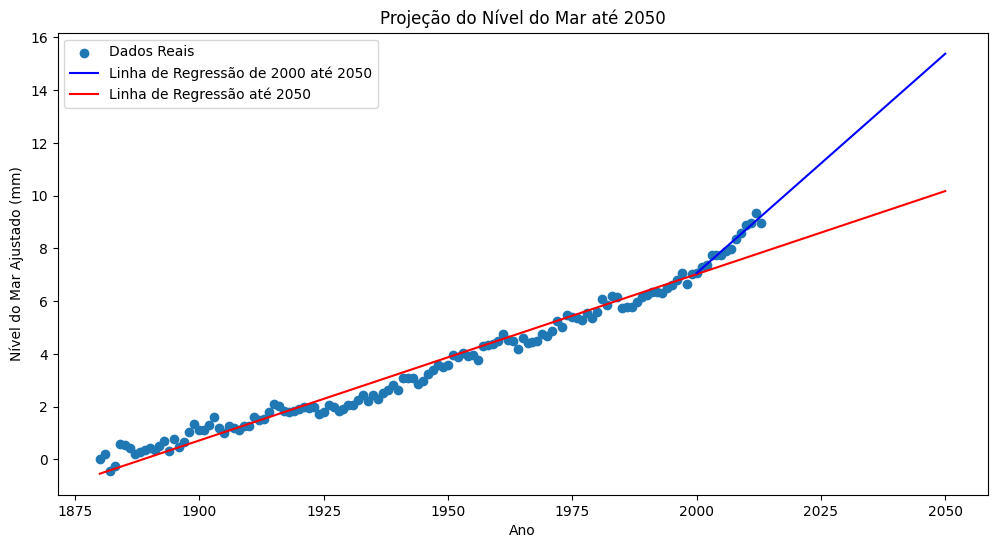

In [62]:
years= np.arange(2000, 2051)
years_extended = np.arange(1880, 2051)
predictions = intercept + slope * years_extended
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Dados Reais',)
plt.plot(years_2000_to_2050, predictions_2000_to_2050, 'b', label='Linha de Regressão de 2000 até 2050',zorder=2)
plt.plot(years_extended, predictions, 'r', label='Linha de Regressão até 2050',zorder=1)
plt.xlabel('Ano')
plt.ylabel('Nível do Mar Ajustado (mm)')
plt.title('Projeção do Nível do Mar até 2050')
plt.legend()
plt.show()